# Salary Prediction: Based on years of experience

What will we answer?

 - Real impact of years on career and salary.

 - Do years influence the position or level of education?

 - How is the salary distributed?

 - *SALARY MODEL PREDICTION*

### Required imports

In [1]:
# Data analysis and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predictive model creation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")  

print('imports completed')

imports completed


In [2]:
# import dataset 
path = 'datasets/salary_prediction_updated_dataset.csv' 
dataset = pd.read_csv(path)
dataset

,YearsExperience,Education Level,Job Role,Salary
0,14.98,PhD,Marketing Specialist,77861.24
1,38.03,PhD,Software Engineer,166880.38
2,29.28,Bachelor's,Business Analyst,123573.27
3,23.95,Master's,Marketing Specialist,90155.08
4,6.24,Master's,Business Analyst,55931.41
...,...,...,...,...
99995,31.69,High School,Data Scientist,147608.78
99996,31.17,High School,Marketing Specialist,117267.24
99997,26.98,Associate Degree,Business Analyst,118188.50
99998,19.98,Master's,Data Scientist,108768.46


In [3]:
dataset.columns.tolist()

['YearsExperience', 'Education Level', 'Job Role', 'Salary']

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   YearsExperience  100000 non-null  float64
 1   Education Level  100000 non-null  object 
 2   Job Role         100000 non-null  object 
 3   Salary           100000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.1+ MB


In [5]:
dataset.isna().sum()

YearsExperience    0
Education Level    0
Job Role           0
Salary             0
dtype: int64

In [6]:
dataset.isnull().sum()

YearsExperience    0
Education Level    0
Job Role           0
Salary             0
dtype: int64

In [7]:
dataset.duplicated().sum()

np.int64(0)

In [8]:
dataset['Education Level'].unique().tolist()

['PhD', "Bachelor's", "Master's", 'High School', 'Associate Degree']

In [9]:
dataset['Job Role'].unique().tolist()

['Marketing Specialist',
 'Software Engineer',
 'Business Analyst',
 'Product Manager',
 'Data Scientist']

### EDA (exploratory data analysis)

#### Univariate analysis

In [10]:
dataset.columns

Index(['YearsExperience', 'Education Level', 'Job Role', 'Salary'], dtype='object')

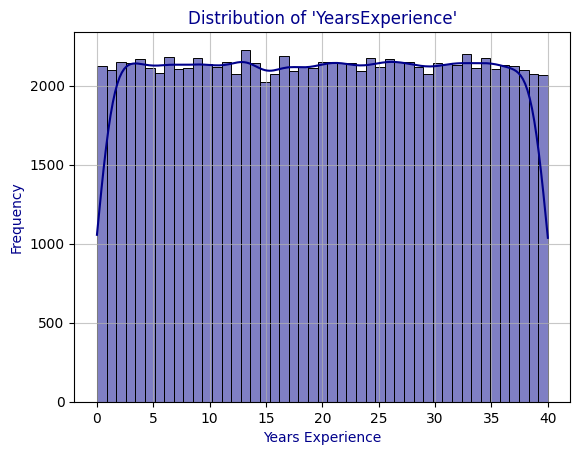

In [11]:
# Distribution of 'YearsExperience'
cDB = 'darkblue'
plt.title("Distribution of 'YearsExperience'", color=cDB)
sns.histplot(dataset['YearsExperience'], kde=True, color=cDB)
plt.grid(alpha=0.7)
plt.xlabel('Years Experience', color=cDB)
plt.ylabel('Frequency', color=cDB)
plt.show()

count    100000.000000
mean         19.979528
std          11.533637
min           0.000000
25%           9.980000
50%          20.025000
75%          29.980000
max          40.000000
Name: YearsExperience, dtype: float64


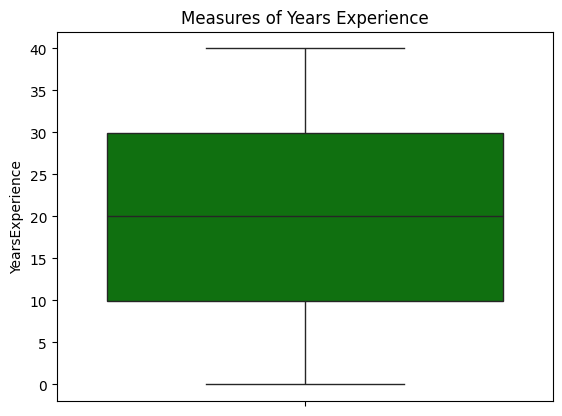

In [12]:
plt.title('Measures of Years Experience')
fig2 = sns.boxplot(dataset['YearsExperience'], color='green')
print(dataset['YearsExperience'].describe())
plt.show()

Job Role
Data Scientist          20127
Software Engineer       20063
Business Analyst        19986
Product Manager         19959
Marketing Specialist    19865
Name: count, dtype: int64


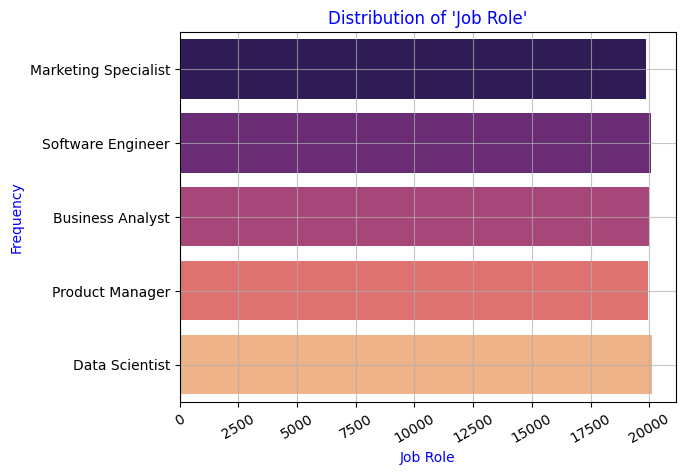

In [13]:
# Distribution of 'Job Role'
cDB = 'blue'
plt.title("Distribution of 'Job Role'", color=cDB)
sns.countplot(dataset['Job Role'], palette="magma")
plt.grid(alpha=0.7)
plt.xlabel('Job Role', color=cDB)
plt.ylabel('Frequency', color=cDB)
plt.xticks(rotation=30)
print(dataset['Job Role'].value_counts())
plt.show()

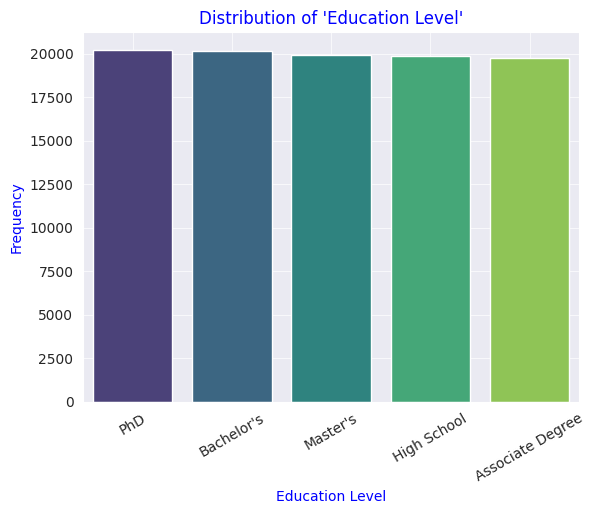

In [30]:
# Distribution of 'Education Level'
cDB = 'blue'
plt.title("Distribution of 'Education Level'", color=cDB)
sns.countplot(x='Education Level', data=dataset, palette="viridis")  # Passando o nome da coluna
plt.grid(alpha=0.7)
plt.xlabel('Education Level', color=cDB)
plt.ylabel('Frequency', color=cDB)
plt.xticks(rotation=30)
plt.show()


Salary
144177.96    3
113364.58    2
140438.12    2
85588.01     2
82504.58     2
            ..
119176.87    1
104809.87    1
40653.91     1
105527.57    1
59999.45     1
Name: count, Length: 99642, dtype: int64


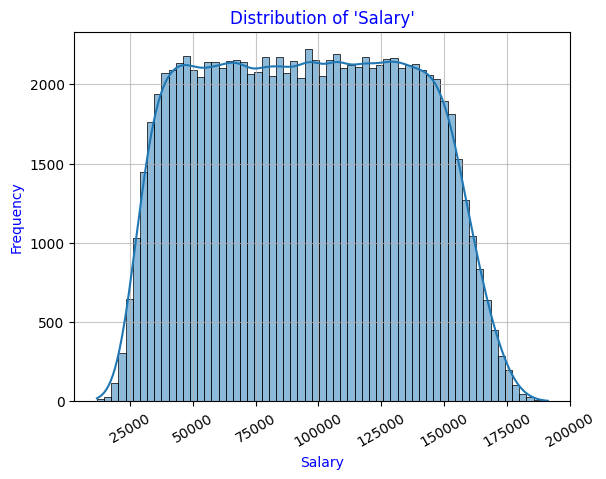

In [18]:
# Distribution of 'Salary'
cDB = 'blue'
plt.title("Distribution of 'Salary'", color=cDB)
sns.histplot(dataset['Salary'], palette="magma", kde=True)
plt.grid(alpha=0.7)
plt.xlabel('Salary', color=cDB)
plt.ylabel('Frequency', color=cDB)
plt.xticks(rotation=30)
print(dataset['Salary'].value_counts())
plt.show()

count    100000.000000
mean      95161.800647
std       39447.389834
min       11950.770000
25%       61469.317500
50%       95144.280000
75%      128412.957500
max      191232.000000
Name: Salary, dtype: float64


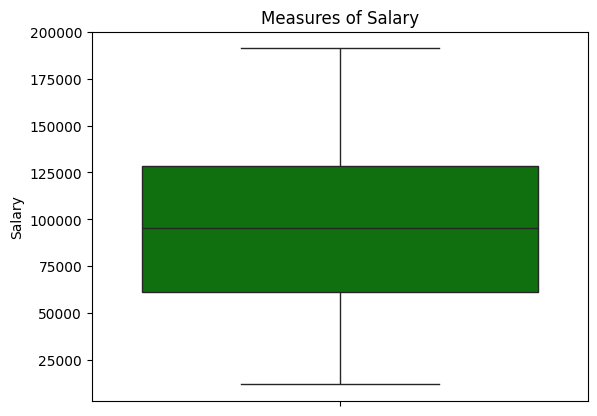

In [19]:
plt.title('Measures of Salary')
fig2 = sns.boxplot(dataset['Salary'], color='green')
print(dataset['Salary'].describe())
plt.show()

#### Multivariate analysis and correlation

In [20]:
# Heatmap of all correlations numeric variable

In [21]:
dataset.columns

Index(['YearsExperience', 'Education Level', 'Job Role', 'Salary'], dtype='object')

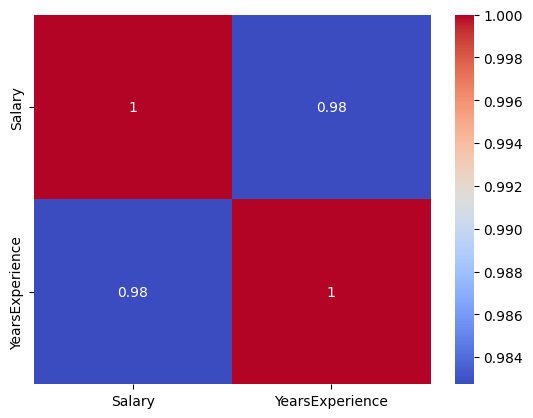

0.9827315252831424


In [22]:
dataset_numeric = dataset[['Salary','YearsExperience' ]]
sns.heatmap(dataset_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

print(dataset['Salary'].corr(dataset['YearsExperience']))

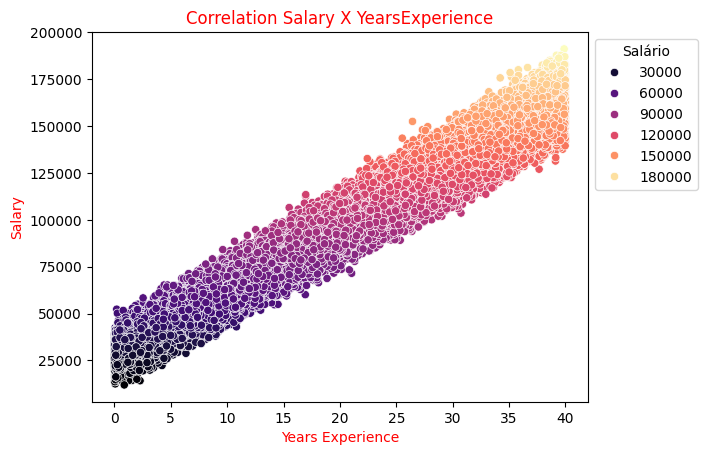

In [23]:
plt.title('Correlation Salary X YearsExperience', color='red')
sns.scatterplot(x='YearsExperience', y='Salary', data=dataset, palette='magma' , hue='Salary')
plt.xlabel('Years Experience', color='red')
plt.ylabel('Salary',color='red')
plt.legend(title='Salário', bbox_to_anchor=(1, 1), loc='upper left')
sns.set_style("darkgrid")
plt.show()

In [24]:
# Salary for Education Level
dataset.groupby('Education Level')['Salary'].agg(['max','min','mean']).sort_values(by='mean',ascending=False)

,max,min,mean
Education Level,,,
High School,186335.39,14186.61,95326.900425
PhD,187782.22,11950.77,95309.356020
Master's,191232.00,13756.41,95289.337836
Bachelor's,184647.38,13650.77,95257.624070
Associate Degree,186094.79,13823.27,94618.858344


In [25]:
# Salary for Job role
dataset.groupby('Job Role')['Salary'].agg(['max','min','mean']).sort_values(by='mean',ascending=False)

,max,min,mean
Job Role,,,
Data Scientist,191232.00,16660.62,102153.748031
Product Manager,182691.55,12519.20,97430.116639
Business Analyst,174617.90,13756.41,93558.377676
Software Engineer,176179.75,11950.77,93381.410850
Marketing Specialist,167241.51,13650.77,89209.911800


In [26]:
dataset.sample(2)

,YearsExperience,Education Level,Job Role,Salary
46203,37.54,Bachelor's,Business Analyst,143041.79
39761,12.48,Associate Degree,Product Manager,73025.24


### Creation of a salary prediction model

In [27]:
# Transforming all variables into numerics
dataset2 = pd.get_dummies(dataset, columns =['Job Role','Education Level' ], dtype=int)
dataset2.sample(3)

,YearsExperience,Salary,Job Role_Business Analyst,Job Role_Data Scientist,Job Role_Marketing Specialist,Job Role_Product Manager,Job Role_Software Engineer,Education Level_Associate Degree,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD
8217,12.53,78825.02,0,1,0,0,0,0,0,0,0,1
95172,28.09,117912.94,0,0,0,1,0,0,0,1,0,0
44260,30.17,126707.27,1,0,0,0,0,0,0,0,1,0


In [28]:
# starting the regression model and training it
model = LinearRegression()
X = dataset2.drop('Salary', axis=1)
y = dataset2['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=7)
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# predict model 
y_pred = model.predict(X_test)

#metrics MAE & R2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2_score:{r2:.2f} and MAE:{mae:.2f}')

R2_score:0.98 and MAE:4688.94


##### Interpretation of Metrics:

    R² Score: 0.98: This means that 98% of the salary variance can be explained by the independent variables (years of experience, level of education and position). This is an excellent result!
        A value close to 1 suggests a well-adjusted model.

    MAE: 4688.94: The average absolute error is approximately 4688.94, which means that, on average, the model makes an error of approximately R$4,689.00 for each salary forecast.